**CAMB usage example for matter power spectrum**

Taken from https://camb.readthedocs.io/en/latest/CAMBdemo.html

In [2]:
!pip install camb

     |████████████████████████████████| 1.5MB 7.5MB/s 
  Created wheel for camb: filename=camb-1.1.3-cp36-none-any.whl size=893240 sha256=9a9e9e35a76fb89d747c4222c99d8171ce8bf43855496d0f57b8cbec395e288d
  Stored in directory: /root/.cache/pip/wheels/6d/16/fb/9b365ff95e80a97ca666481803455312674ebc4cc53dc85095
Successfully built camb


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

In [7]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
k_over_h, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


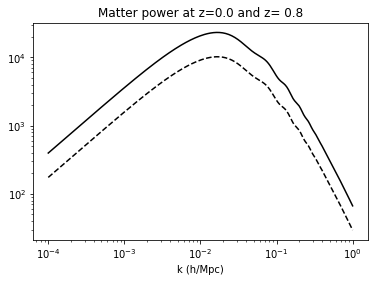

In [8]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(k_over_h, pk[i,:], color='k', ls = line)
plt.xlabel('k (h/Mpc)');
plt.title('Matter power at z=%s and z= %s'%tuple(z));